# A better way to visualize Decision Trees with the dtreeviz library

The notebook can contains the code for the accompanying blogpost titled **[A better way to visualize Decision Trees with the dtreeviz library](https://towardsdatascience.com/a-better-way-to-visualize-decision-trees-with-the-dtreeviz-library-758994cdf05e?sk=ad5fcdf665e07388a829bb5320be9a6f)** by [Parul Pandey](https://www.linkedin.com/in/parulpandeyindia/)


## Installation

```
#conda
conda uninstall python-graphviz
conda uninstall graphviz

#pip
pip install dtreeviz             # install dtreeviz for sklearn
pip install dtreeviz[xgboost]    # install XGBoost related dependency
pip install dtreeviz[pyspark]    # install pyspark related dependency
pip install dtreeviz[lightgbm]   # install LightGBM related dependency
This should also pull in the graphviz Python library (>=0.9), which we are using for platform specific stuff.

```
For details see: https://github.com/parrt/dtreeviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from dtreeviz.trees import *
import graphviz 

import warnings
warnings.filterwarnings("ignore") 


In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
features = wine.drop('quality',axis=1)
target = wine['quality']

## Regression decision tree

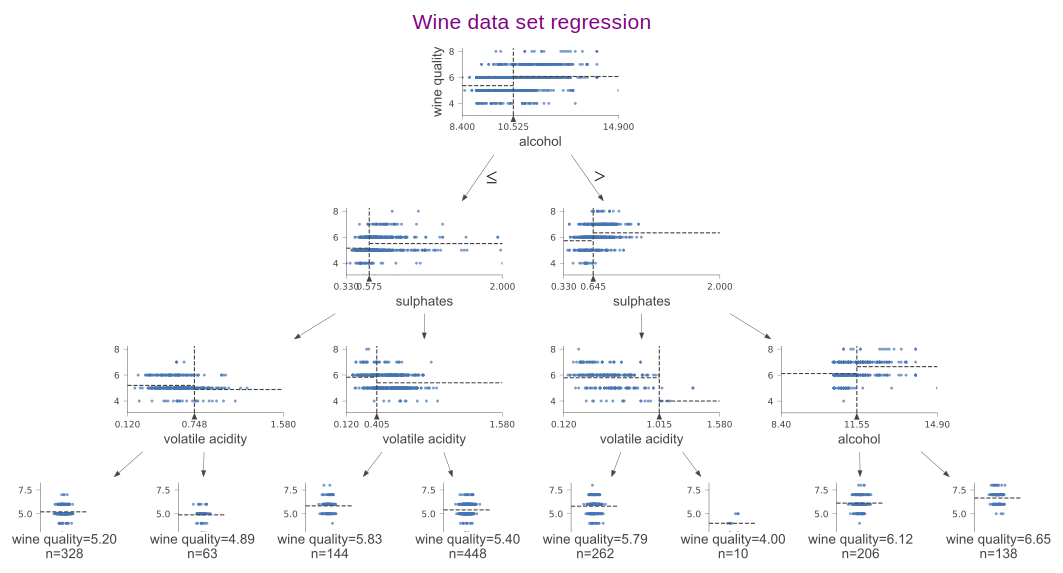

<Figure size 1800x1440 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(features, target)
viz = dtreeviz(regr,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

## Classification tree on Wine data

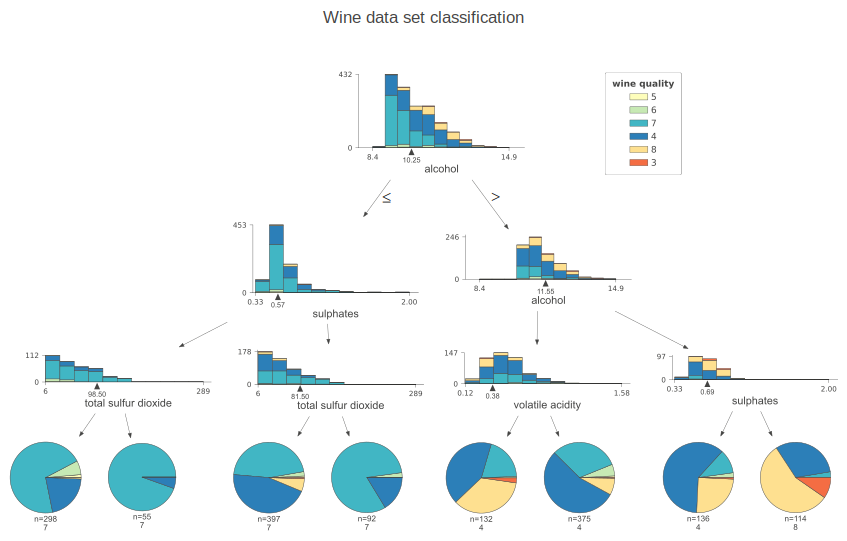

<Figure size 1800x1440 with 0 Axes>

In [6]:

fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               histtype='barstacked', # default 
               scale=1.2)
viz

# Customizations

## Trees with left to right alignment

The orientation parameter can be set to `LR` to display the trees from left to right rather than top-down

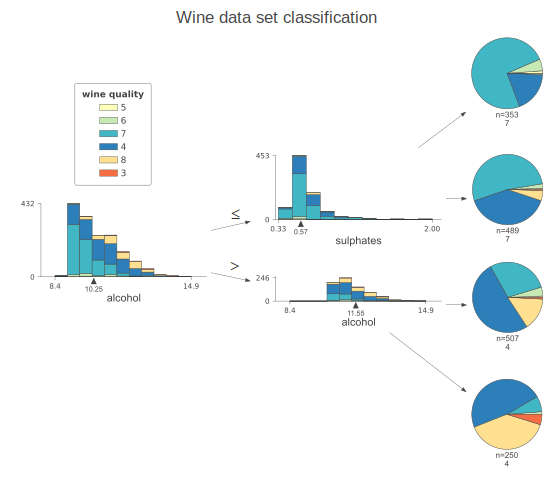

<Figure size 1800x1440 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               orientation='LR', 
               scale=1.2)
viz

## Prediction path of a single observation
The library also helps to isolate and understand which decision path is followed by a specific test observation. This is very useful in explaining the prediction or the results to others. For instance, let’s pick out a random sample from the dataset and traverse its decision path.


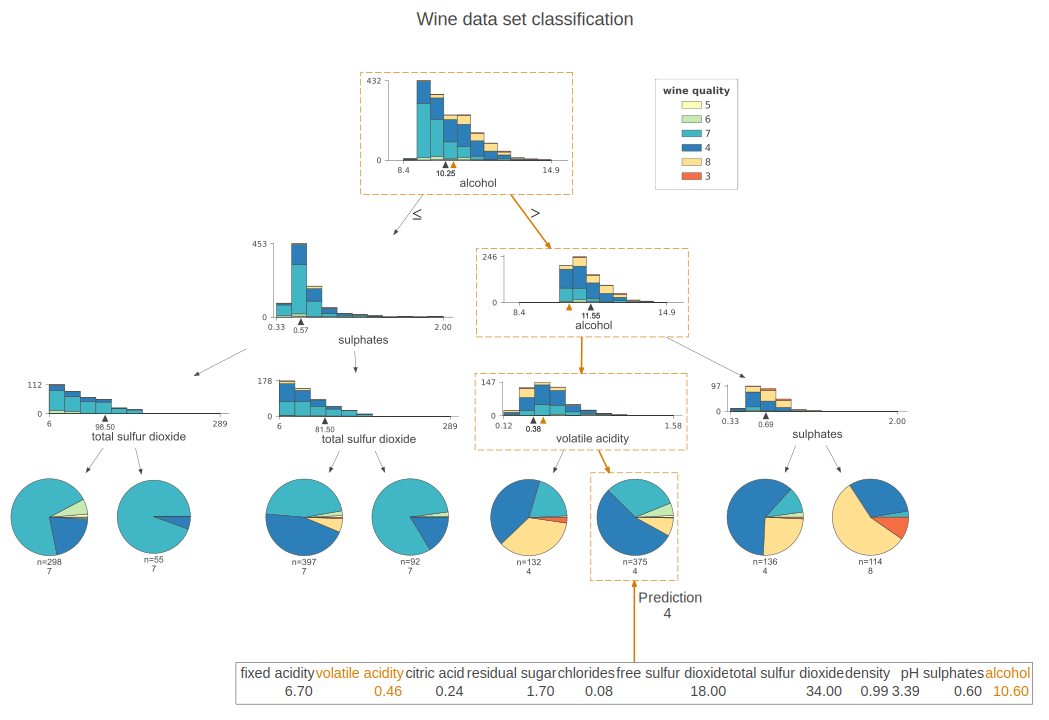

<Figure size 1800x1440 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
X = features.iloc[np.random.randint(0, len(features)),:].values
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               scale=1.3,
               X=X)
viz